# Reading datasets

In [158]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
BRAND_FEATURE = 'brand'
TYPE_OF_COMPANY_FEATURE = 'type_of_company'
PROFILE_FEATURE = 'Profile'

INTERNATIONAL_TYPE = "international"
LOCAL_TYPE = "local"

INTERNATIONAL_COMPANIES = ['@corendon.nl', '@vakantiediscounter', '@prijsvrijvakanties', '@sunweb', '@tuinederland',
                           '@dreizenvakanties', '@elizawashere']
LOCAL_COMPANIES = ['@accessibletravelnetherlands', '@cherrytraveltours', '@hollandtravel', '@lvtravelagency',
                   '@tomstraveltours', '@tenzing_travel', '@cruisetravelnl']

In [160]:
def remove_outliers_by_quantile(data: pd.DataFrame, features=[]):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

    return data

In [161]:
def plot_boxplots(data, log_transform=False):
    num_cols = len(data.columns)
    num_rows = (num_cols + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(data.columns):
        ax = axes[i]

        if log_transform:
            plot_data = np.log1p(data[col])
            ax.set_title(f'Log(1+{col})')
        else:
            plot_data = data[col]
            ax.set_title(f'Boxplot of {col}')

        sns.boxplot(y=plot_data, ax=ax, color='skyblue', width=0.4,
                    flierprops={'marker': 'o', 'color': 'red', 'markersize': 5})

        ax.set_ylabel(col)

    for i in range(len(data.columns), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


In [162]:
def plot_features_density(data):
    num_cols = len(data.columns)
    num_rows = (num_cols + 1) // 2

    plt.figure(figsize=(15, num_rows * 5))

    for i, col in enumerate(data.columns):
        plt.subplot(num_rows, 2, i + 1)

        plt.hist(data[col], bins=50, range=(data[col].min(), data[col].quantile(0.95)),
                 alpha=0.6, color='g', density=True, label='Histogram')

        sns.kdeplot(data[col], color='r', linewidth=2, label='KDE Trend')

        plt.xlabel(col)
        plt.ylabel('Density')
        plt.title(f'Distribution of {col}')
        plt.legend()

    plt.tight_layout()
    plt.show()

Analyzes DataFrame columns to identify and summarize non-numeric values.

In [163]:
def count_non_number_values(df: pd.DataFrame, feature_list: list) -> pd.DataFrame:
    """
    Analyzes specified columns in a pandas DataFrame to detect non-numeric values 
    (i.e., values that are not of type int or float). For each column, the function 
    provides example non-numeric entries, their count, and their relative frequency.

    :param df: A pandas DataFrame containing the dataset.
    :param feature_list: A list of column names (features) to evaluate.
    :return: A pandas DataFrame summarizing the count and frequency of non-numeric values 
             per specified column, along with a few example values.
    """

    # Dictionary to store results for each specified feature/column
    results = {}

    # Loop over each feature in the provided list
    for col in feature_list:
        # Proceed only if the column exists in the DataFrame
        if col in df.columns:
            # Identify values in the column that are NOT integers or floats
            non_int_values = df[col][df[col].apply(lambda x: not isinstance(x, (int, float)))]

            # Store the analysis results for the current column
            results[col] = {
                # Collect up to 5 unique examples of non-numeric values
                "Examples": non_int_values.unique()[:5],

                # Count of non-numeric entries in the column
                "Non-Int Count": non_int_values.shape[0],

                # Relative frequency (%) of non-numeric values in the column
                "Relative frequency": f"{round(non_int_values.shape[0] / df[col].shape[0] * 100, 2)}%",
            }

    # Convert the results dictionary to a DataFrame, using feature names as the index
    return pd.DataFrame.from_dict(results, orient="index")

In [164]:
def read_dataset(brand_name: str, folder: str):
    df = pd.read_excel(f'./data/{folder}/{brand_name}.xlsx')
    return df

In [165]:
def combine_dataset(companies: list[str], type: str):
    agencies_df = []

    for name in companies:
        current_df = read_dataset(name, type)
        current_df[PROFILE_FEATURE] = name
        agencies_df.append(current_df)

    agencies_df = pd.concat(agencies_df)
    agencies_df[TYPE_OF_COMPANY_FEATURE] = type

    return agencies_df

In [166]:
international_final_df = combine_dataset(INTERNATIONAL_COMPANIES, INTERNATIONAL_TYPE)
international_final_df.to_excel('./data/international.xlsx', index=False)

international_final_df

,Date,Message,Profile,Network,Engagement,Post interaction rate,Number of comments,"Reactions, Comments & Shares",Number of Likes,Message-ID,Profile-ID,Link,type_of_company
0,2025-03-17 19:01:17,??Ontvang nu extra vroegboekkorting tot €200 é...,@corendon.nl,INSTAGRAM,0.001174,0.001174,3,185,182,18038388467208858,1466583220,https://www.instagram.com/reel/DHT7mD7PW0A/,international
1,2025-03-16 14:00:14,"Zon, zee en eindeloze siesta’s… ????☀️ In Span...",@corendon.nl,INSTAGRAM,0.000584,0.000584,0,92,92,18039075278448488,1466583220,https://www.instagram.com/p/DHQ0Zedsckb/,international
2,2025-03-16 09:00:39,"☀️ Welkom bij Voyage Belek Golf & Spa, waar ee...",@corendon.nl,INSTAGRAM,0.000838,0.000838,1,132,131,18085134403543445,1466583220,https://www.instagram.com/reel/DHQSGJMB3Nl/,international
3,2025-03-15 09:00:32,Hotel Diamond Excellence Resort & Spa in Side ...,@corendon.nl,INSTAGRAM,0.001041,0.001041,0,164,164,17842557165447487,1466583220,https://www.instagram.com/p/DHNtTrRsRIj/,international
4,2025-03-14 13:01:48,Last-Minute Deal: €70 Korting op het Ladies of...,@corendon.nl,INSTAGRAM,0.001612,0.001612,5,254,249,18046848881361680,1466583220,https://www.instagram.com/p/DHLkIA1sQxy/,international
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,2014-08-05 09:33:06,Beleef jij deze zomer een ultiem #elizamomentj...,@elizawashere,INSTAGRAM,-,-,5,20,15,17842862974034381,1258146380,https://www.instagram.com/p/rT8t-nlZRg/,international
1627,2014-08-04 16:54:05,Lig jij deze zomer hier? Je hebt nog tot morge...,@elizawashere,INSTAGRAM,-,-,4,19,15,17841991168034381,1258146380,https://www.instagram.com/p/rSKY5wFZcT/,international
1628,2014-07-30 17:08:00,Puur genieten op een ligbedje bij het zwembad....,@elizawashere,INSTAGRAM,-,-,1,16,15,17842038979034381,1258146380,https://www.instagram.com/p/rFUAgoFZV-/,international
1629,2014-07-29 16:28:38,"Ken je dat gevoel? Je haren in de wind, je voe...",@elizawashere,INSTAGRAM,-,-,9,22,13,17841828277034381,1258146380,https://www.instagram.com/p/rCqtQHlZRN/,international


In [167]:
local_final_df = combine_dataset(LOCAL_COMPANIES, LOCAL_TYPE)
local_final_df.to_excel('./data/local.xlsx', index=False)

local_final_df

,Date,Message,Profile,Network,Engagement,Post interaction rate,Number of comments,"Reactions, Comments & Shares",Number of Likes,Message-ID,Profile-ID,Link,type_of_company
0,2025-03-01 09:04:43,Discover Nijmegen: The Oldest City in the Neth...,@accessibletravelnetherlands,INSTAGRAM,0.008539,0.008539,0,9,9,18052737773131838,43939331,https://www.instagram.com/p/DGpqqf8o9yE/,local
1,2025-02-05 11:14:13,Amsterdam should be at the top of your travel ...,@accessibletravelnetherlands,INSTAGRAM,-,-,1,26,25,18101839216492258,43939331,https://www.instagram.com/p/DFsGZ3voYrG/,local
2,2025-01-31 15:32:04,The Veluwe ❤️\n\nExplore one of the most stunn...,@accessibletravelnetherlands,INSTAGRAM,-,-,0,5,5,18090951523529057,43939331,https://www.instagram.com/p/DFfr8IVoPZf/,local
3,2025-01-29 16:31:20,Experience the Traditional Gouda Cheese Market...,@accessibletravelnetherlands,INSTAGRAM,-,-,0,9,9,18060269164931558,43939331,https://www.instagram.com/p/DFapIbBoaj7/,local
4,2025-01-26 16:20:51,"At Accessible Travel Netherlands, we offer 10 ...",@accessibletravelnetherlands,INSTAGRAM,-,-,0,5,5,18051201320326350,43939331,https://www.instagram.com/p/DFS5jAbIHIC/,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2019-08-23 09:39:08,Heeft u mooie foto’s van uw eigen cruise gemaa...,@cruisetravelnl,INSTAGRAM,-,-,0,22,22,17868232276456526,5621753329,https://www.instagram.com/p/B1gHPoyCygq/,local
180,2019-07-15 14:54:46,Onze ambassadeur Henk van der Noort heeft een ...,@cruisetravelnl,INSTAGRAM,-,-,2,26,24,17847898231507730,5621753329,https://www.instagram.com/p/Bz8QXReChhs/,local
181,2019-07-01 10:31:44,Onze ambassadeur A. Prevo ging aan boord van d...,@cruisetravelnl,INSTAGRAM,-,-,0,23,23,18079004770055863,5621753329,https://www.instagram.com/p/BzXvIioiGI2/,local
182,2019-06-20 08:12:23,Verschillende reisbureaus op avontuur naar Ala...,@cruisetravelnl,INSTAGRAM,-,-,3,49,46,18049625401089614,5621753329,https://www.instagram.com/p/By7KcTpiXN4/,local


In [168]:
final_df = pd.concat([international_final_df, local_final_df])
final_df.to_excel('./final.xlsx', index=False)
final_df

,Date,Message,Profile,Network,Engagement,Post interaction rate,Number of comments,"Reactions, Comments & Shares",Number of Likes,Message-ID,Profile-ID,Link,type_of_company
0,2025-03-17 19:01:17,??Ontvang nu extra vroegboekkorting tot €200 é...,@corendon.nl,INSTAGRAM,0.001174,0.001174,3,185,182,18038388467208858,1466583220,https://www.instagram.com/reel/DHT7mD7PW0A/,international
1,2025-03-16 14:00:14,"Zon, zee en eindeloze siesta’s… ????☀️ In Span...",@corendon.nl,INSTAGRAM,0.000584,0.000584,0,92,92,18039075278448488,1466583220,https://www.instagram.com/p/DHQ0Zedsckb/,international
2,2025-03-16 09:00:39,"☀️ Welkom bij Voyage Belek Golf & Spa, waar ee...",@corendon.nl,INSTAGRAM,0.000838,0.000838,1,132,131,18085134403543445,1466583220,https://www.instagram.com/reel/DHQSGJMB3Nl/,international
3,2025-03-15 09:00:32,Hotel Diamond Excellence Resort & Spa in Side ...,@corendon.nl,INSTAGRAM,0.001041,0.001041,0,164,164,17842557165447487,1466583220,https://www.instagram.com/p/DHNtTrRsRIj/,international
4,2025-03-14 13:01:48,Last-Minute Deal: €70 Korting op het Ladies of...,@corendon.nl,INSTAGRAM,0.001612,0.001612,5,254,249,18046848881361680,1466583220,https://www.instagram.com/p/DHLkIA1sQxy/,international
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2019-08-23 09:39:08,Heeft u mooie foto’s van uw eigen cruise gemaa...,@cruisetravelnl,INSTAGRAM,-,-,0,22,22,17868232276456526,5621753329,https://www.instagram.com/p/B1gHPoyCygq/,local
180,2019-07-15 14:54:46,Onze ambassadeur Henk van der Noort heeft een ...,@cruisetravelnl,INSTAGRAM,-,-,2,26,24,17847898231507730,5621753329,https://www.instagram.com/p/Bz8QXReChhs/,local
181,2019-07-01 10:31:44,Onze ambassadeur A. Prevo ging aan boord van d...,@cruisetravelnl,INSTAGRAM,-,-,0,23,23,18079004770055863,5621753329,https://www.instagram.com/p/BzXvIioiGI2/,local
182,2019-06-20 08:12:23,Verschillende reisbureaus op avontuur naar Ala...,@cruisetravelnl,INSTAGRAM,-,-,3,49,46,18049625401089614,5621753329,https://www.instagram.com/p/By7KcTpiXN4/,local


# EDA

In [169]:
international_final_df.describe()

,Date,Number of comments,"Reactions, Comments & Shares",Profile-ID
count,17627,17627.000000,17627.000000,1.762700e+04
mean,2019-11-02 21:23:25.387133184,22.266409,254.677937,1.479503e+09
min,2013-08-15 08:02:58,0.000000,0.000000,5.021199e+08
25%,2017-05-24 18:26:30,1.000000,64.000000,1.192468e+09
50%,2019-07-21 15:30:04,3.000000,120.000000,1.466583e+09
75%,2022-03-17 13:43:26.500000,9.000000,247.000000,1.808131e+09
max,2025-03-18 09:30:54,28517.000000,57639.000000,3.536427e+09
std,NaN,347.068236,825.503149,8.203640e+08


In [170]:
international_final_df.dtypes

Date                            datetime64[ns]
Message                                 object
Profile                                 object
Network                                 object
Engagement                              object
Post interaction rate                   object
Number of comments                       int64
Reactions, Comments & Shares             int64
Number of Likes                         object
Message-ID                              object
Profile-ID                               int64
Link                                    object
type_of_company                         object
dtype: object

In [171]:
international_final_df.isna().sum()

Date                             0
Message                         16
Profile                          0
Network                          0
Engagement                       0
Post interaction rate            0
Number of comments               0
Reactions, Comments & Shares     0
Number of Likes                  0
Message-ID                       0
Profile-ID                       0
Link                             2
type_of_company                  0
dtype: int64

In [172]:
local_final_df.Profile.unique()

array(['@accessibletravelnetherlands', '@cherrytraveltours',
       '@hollandtravel', '@lvtravelagency', '@tomstraveltours',
       '@tenzing_travel', '@cruisetravelnl'], dtype=object)

In [173]:
POTENTIAL_INT_FEATURES = ['Number of Likes', 'Engagement', 'Post interaction rate']
count_non_number_values(international_final_df, POTENTIAL_INT_FEATURES)

,Examples,Non-Int Count,Relative frequency
Number of Likes,[-],36,0.2%
Engagement,[-],5678,32.21%
Post interaction rate,[-],5678,32.21%


# Dataset preparation

In [174]:
FOLLOWERS_FOR_PROFILES = {
    '@corendon.nl': 157000, 
    '@vakantiediscounter': 32000, 
    '@prijsvrijvakanties': 33600,
    '@sunweb': 104000, 
    '@tuinederland': 159000, 
    '@dreizenvakanties': 18100, 
    '@elizawashere': 95100,
    '@accessibletravelnetherlands': 1084, 
    '@cherrytraveltours': 1421,
    '@hollandtravel': 905, 
    '@lvtravelagency': 1722, 
    '@tomstraveltours': 956,
    '@tenzing_travel': 968, 
    '@cruisetravelnl': 1099
}

In [175]:
final_df['comments_to_followers'] = final_df['Number of comments'] / final_df['Profile'].map(FOLLOWERS_FOR_PROFILES) * 10000
final_df

,Date,Message,Profile,Network,Engagement,Post interaction rate,Number of comments,"Reactions, Comments & Shares",Number of Likes,Message-ID,Profile-ID,Link,type_of_company,comments_to_followers
0,2025-03-17 19:01:17,??Ontvang nu extra vroegboekkorting tot €200 é...,@corendon.nl,INSTAGRAM,0.001174,0.001174,3,185,182,18038388467208858,1466583220,https://www.instagram.com/reel/DHT7mD7PW0A/,international,0.191083
1,2025-03-16 14:00:14,"Zon, zee en eindeloze siesta’s… ????☀️ In Span...",@corendon.nl,INSTAGRAM,0.000584,0.000584,0,92,92,18039075278448488,1466583220,https://www.instagram.com/p/DHQ0Zedsckb/,international,0.000000
2,2025-03-16 09:00:39,"☀️ Welkom bij Voyage Belek Golf & Spa, waar ee...",@corendon.nl,INSTAGRAM,0.000838,0.000838,1,132,131,18085134403543445,1466583220,https://www.instagram.com/reel/DHQSGJMB3Nl/,international,0.063694
3,2025-03-15 09:00:32,Hotel Diamond Excellence Resort & Spa in Side ...,@corendon.nl,INSTAGRAM,0.001041,0.001041,0,164,164,17842557165447487,1466583220,https://www.instagram.com/p/DHNtTrRsRIj/,international,0.000000
4,2025-03-14 13:01:48,Last-Minute Deal: €70 Korting op het Ladies of...,@corendon.nl,INSTAGRAM,0.001612,0.001612,5,254,249,18046848881361680,1466583220,https://www.instagram.com/p/DHLkIA1sQxy/,international,0.318471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2019-08-23 09:39:08,Heeft u mooie foto’s van uw eigen cruise gemaa...,@cruisetravelnl,INSTAGRAM,-,-,0,22,22,17868232276456526,5621753329,https://www.instagram.com/p/B1gHPoyCygq/,local,0.000000
180,2019-07-15 14:54:46,Onze ambassadeur Henk van der Noort heeft een ...,@cruisetravelnl,INSTAGRAM,-,-,2,26,24,17847898231507730,5621753329,https://www.instagram.com/p/Bz8QXReChhs/,local,18.198362
181,2019-07-01 10:31:44,Onze ambassadeur A. Prevo ging aan boord van d...,@cruisetravelnl,INSTAGRAM,-,-,0,23,23,18079004770055863,5621753329,https://www.instagram.com/p/BzXvIioiGI2/,local,0.000000
182,2019-06-20 08:12:23,Verschillende reisbureaus op avontuur naar Ala...,@cruisetravelnl,INSTAGRAM,-,-,3,49,46,18049625401089614,5621753329,https://www.instagram.com/p/By7KcTpiXN4/,local,27.297543


In [176]:
final_df['comments_to_followers'].describe()

count    21152.000000
mean         4.209540
std         29.865445
min          0.000000
25%          0.105152
50%          0.552486
75%          1.562500
max       2212.543554
Name: comments_to_followers, dtype: float64

In [177]:
# plot_features_density(final_df[['Number of comments']])

In [178]:
renamed_final_df = international_final_df.copy()
renamed_final_df.columns = (renamed_final_df.columns
                            .str.lower()
                            .str.replace('[,&]', '', regex=True)
                            .str.replace(r"[ \-]+", '_', regex=True))

renamed_final_df.columns

Index(['date', 'message', 'profile', 'network', 'engagement',
       'post_interaction_rate', 'number_of_comments',
       'reactions_comments_shares', 'number_of_likes', 'message_id',
       'profile_id', 'link', 'type_of_company'],
      dtype='object')

In [179]:
FIELDS_TO_DROP = ['network', 'message_id', 'profile_id']
dropped_final_df = renamed_final_df.drop(FIELDS_TO_DROP, axis=1)
dropped_final_df.columns

Index(['date', 'message', 'profile', 'engagement', 'post_interaction_rate',
       'number_of_comments', 'reactions_comments_shares', 'number_of_likes',
       'link', 'type_of_company'],
      dtype='object')

In [180]:
filtered_final_df = dropped_final_df.dropna()
filtered_final_df = filtered_final_df[filtered_final_df['number_of_likes'].apply(lambda x: isinstance(x, int))]
filtered_final_df['number_of_likes'] = filtered_final_df['number_of_likes'].astype(int)

filtered_final_df

,date,message,profile,engagement,post_interaction_rate,number_of_comments,reactions_comments_shares,number_of_likes,link,type_of_company
0,2025-03-17 19:01:17,??Ontvang nu extra vroegboekkorting tot €200 é...,@corendon.nl,0.001174,0.001174,3,185,182,https://www.instagram.com/reel/DHT7mD7PW0A/,international
1,2025-03-16 14:00:14,"Zon, zee en eindeloze siesta’s… ????☀️ In Span...",@corendon.nl,0.000584,0.000584,0,92,92,https://www.instagram.com/p/DHQ0Zedsckb/,international
2,2025-03-16 09:00:39,"☀️ Welkom bij Voyage Belek Golf & Spa, waar ee...",@corendon.nl,0.000838,0.000838,1,132,131,https://www.instagram.com/reel/DHQSGJMB3Nl/,international
3,2025-03-15 09:00:32,Hotel Diamond Excellence Resort & Spa in Side ...,@corendon.nl,0.001041,0.001041,0,164,164,https://www.instagram.com/p/DHNtTrRsRIj/,international
4,2025-03-14 13:01:48,Last-Minute Deal: €70 Korting op het Ladies of...,@corendon.nl,0.001612,0.001612,5,254,249,https://www.instagram.com/p/DHLkIA1sQxy/,international
...,...,...,...,...,...,...,...,...,...,...
1626,2014-08-05 09:33:06,Beleef jij deze zomer een ultiem #elizamomentj...,@elizawashere,-,-,5,20,15,https://www.instagram.com/p/rT8t-nlZRg/,international
1627,2014-08-04 16:54:05,Lig jij deze zomer hier? Je hebt nog tot morge...,@elizawashere,-,-,4,19,15,https://www.instagram.com/p/rSKY5wFZcT/,international
1628,2014-07-30 17:08:00,Puur genieten op een ligbedje bij het zwembad....,@elizawashere,-,-,1,16,15,https://www.instagram.com/p/rFUAgoFZV-/,international
1629,2014-07-29 16:28:38,"Ken je dat gevoel? Je haren in de wind, je voe...",@elizawashere,-,-,9,22,13,https://www.instagram.com/p/rCqtQHlZRN/,international


In [181]:
filtered_final_df.describe()

,date,number_of_comments,reactions_comments_shares,number_of_likes
count,17573,17573.000000,17573.000000,17573.000000
mean,2019-11-01 03:41:27.016388864,22.297388,255.331930,233.034542
min,2013-08-15 08:02:58,0.000000,0.000000,0.000000
25%,2017-05-24 14:27:57,1.000000,64.000000,61.000000
50%,2019-07-19 14:02:56,3.000000,120.000000,115.000000
75%,2022-03-14 08:30:07,9.000000,247.000000,236.000000
max,2025-03-18 09:30:54,28517.000000,57639.000000,30546.000000
std,NaN,347.598739,826.679829,563.720323


In [182]:
NUMERICAL_FEATURES = ['number_of_likes', 'number_of_comments', 'reactions_comments_shares']

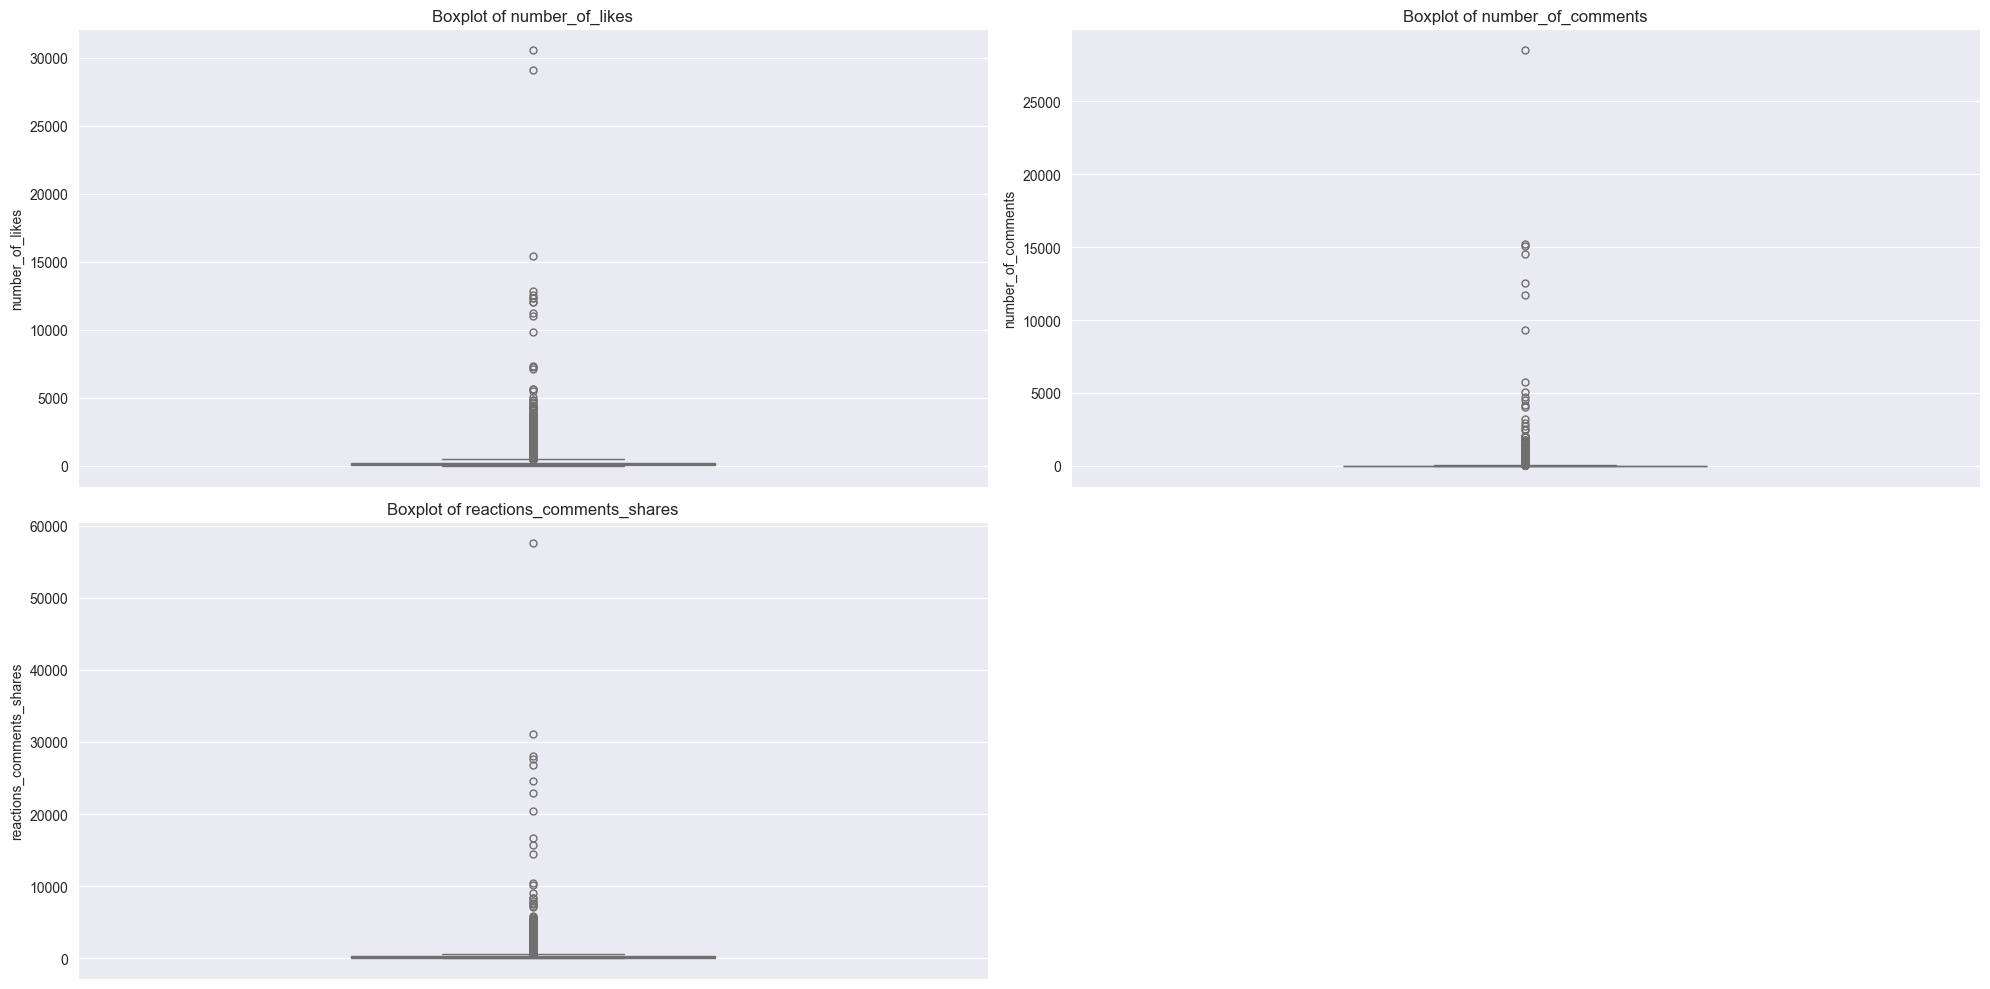

In [183]:
plot_boxplots(filtered_final_df[NUMERICAL_FEATURES])

In [184]:
# filtered_final_df = remove_outliers_by_quantile(filtered_final_df, NUMERICAL_FEATURES)
# filtered_final_df

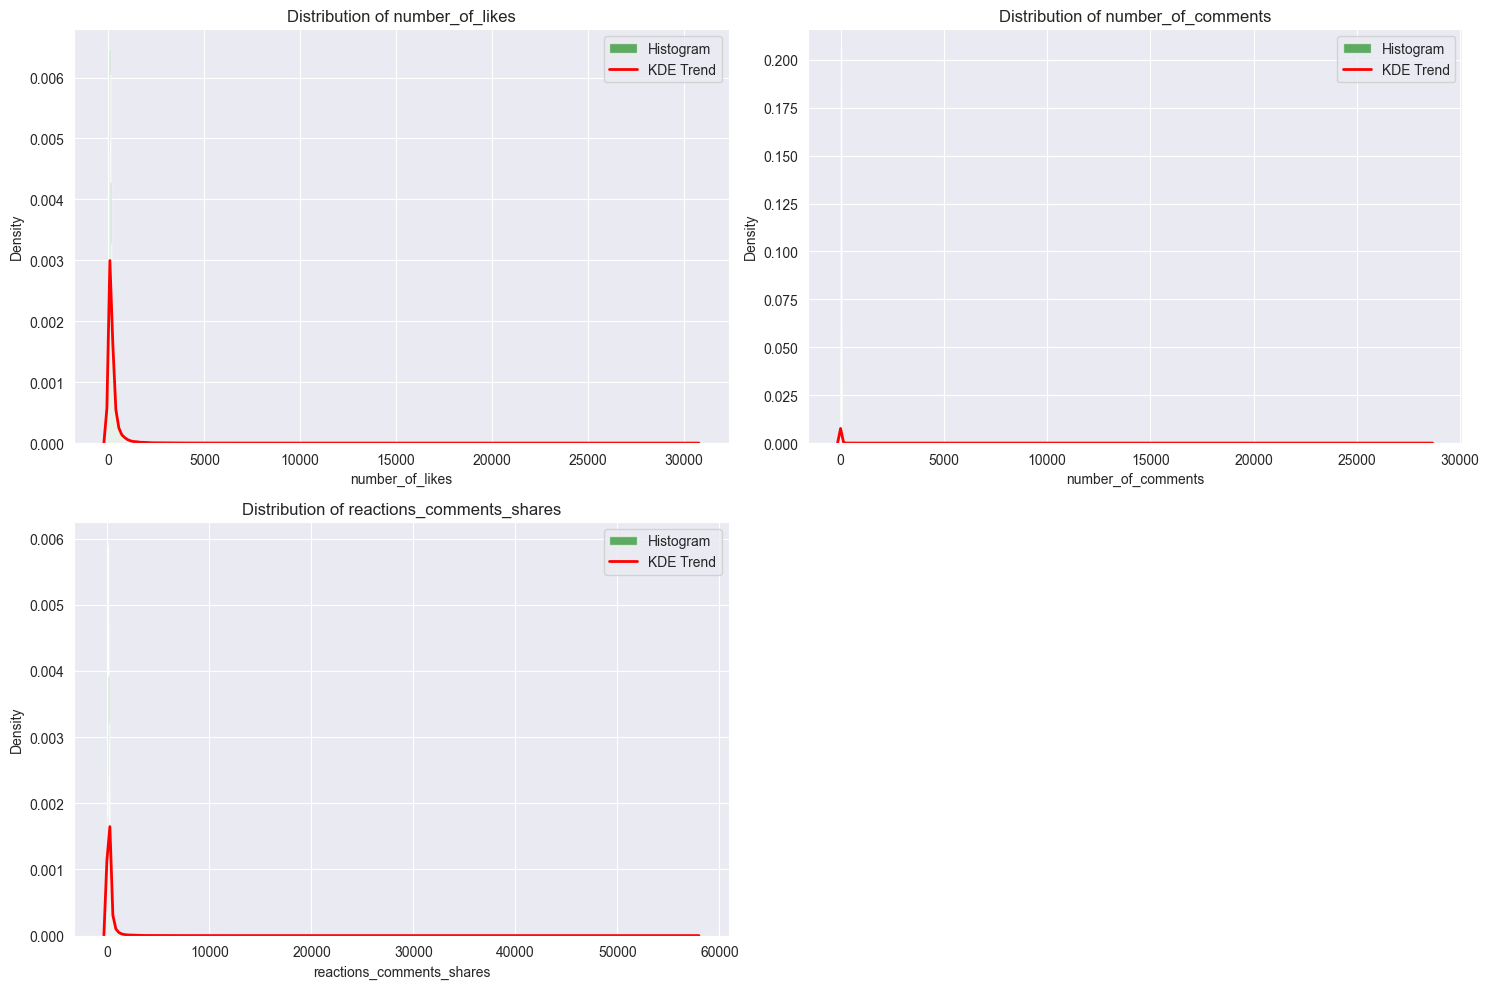

In [185]:
plot_features_density(filtered_final_df[NUMERICAL_FEATURES])

In [186]:
filtered_final_df['likes_to_followers'] = filtered_final_df['number_of_likes'] / filtered_final_df['profile'].map(FOLLOWERS_FOR_PROFILES) * 100
filtered_final_df

,date,message,profile,engagement,post_interaction_rate,number_of_comments,reactions_comments_shares,number_of_likes,link,type_of_company,likes_to_followers
0,2025-03-17 19:01:17,??Ontvang nu extra vroegboekkorting tot €200 é...,@corendon.nl,0.001174,0.001174,3,185,182,https://www.instagram.com/reel/DHT7mD7PW0A/,international,0.115924
1,2025-03-16 14:00:14,"Zon, zee en eindeloze siesta’s… ????☀️ In Span...",@corendon.nl,0.000584,0.000584,0,92,92,https://www.instagram.com/p/DHQ0Zedsckb/,international,0.058599
2,2025-03-16 09:00:39,"☀️ Welkom bij Voyage Belek Golf & Spa, waar ee...",@corendon.nl,0.000838,0.000838,1,132,131,https://www.instagram.com/reel/DHQSGJMB3Nl/,international,0.083439
3,2025-03-15 09:00:32,Hotel Diamond Excellence Resort & Spa in Side ...,@corendon.nl,0.001041,0.001041,0,164,164,https://www.instagram.com/p/DHNtTrRsRIj/,international,0.104459
4,2025-03-14 13:01:48,Last-Minute Deal: €70 Korting op het Ladies of...,@corendon.nl,0.001612,0.001612,5,254,249,https://www.instagram.com/p/DHLkIA1sQxy/,international,0.158599
...,...,...,...,...,...,...,...,...,...,...,...
1626,2014-08-05 09:33:06,Beleef jij deze zomer een ultiem #elizamomentj...,@elizawashere,-,-,5,20,15,https://www.instagram.com/p/rT8t-nlZRg/,international,0.015773
1627,2014-08-04 16:54:05,Lig jij deze zomer hier? Je hebt nog tot morge...,@elizawashere,-,-,4,19,15,https://www.instagram.com/p/rSKY5wFZcT/,international,0.015773
1628,2014-07-30 17:08:00,Puur genieten op een ligbedje bij het zwembad....,@elizawashere,-,-,1,16,15,https://www.instagram.com/p/rFUAgoFZV-/,international,0.015773
1629,2014-07-29 16:28:38,"Ken je dat gevoel? Je haren in de wind, je voe...",@elizawashere,-,-,9,22,13,https://www.instagram.com/p/rCqtQHlZRN/,international,0.013670


In [187]:
inter = filtered_final_df[filtered_final_df['type_of_company'] == 'international']
inter['likes_to_followers'].describe()

count    17573.000000
mean         0.256087
std          0.908467
min          0.000000
25%          0.107006
50%          0.179618
75%          0.281250
max         90.910714
Name: likes_to_followers, dtype: float64

# Statistical testing

## Library

In [188]:
SIGNIFICANT_LEVEL = 0.05

In [189]:
class TwoSampleStatisticalTests:
    def __init__(self, first_dataset: pd.Series, second_dataset: pd.Series, significance_level=SIGNIFICANT_LEVEL):
        self._first_dataset = first_dataset
        self._second_dataset = second_dataset
        self._significance_level = significance_level

    # The function prove hypothesis H0: "The data is normally distributed"
    # Ha then "The data is not normally distributed"
    # I used Shapiro-Wilk’s W test for the proving
    def _check_normality(self):
        _, pvalue_first = stats.shapiro(self._first_dataset)
        _, pvalue_second = stats.shapiro(self._second_dataset)

        print(f"The result of the p-value when checking the normality for the first dataset: {pvalue_first}")
        print(f"The result of the p-value when checking the normality for the second dataset: {pvalue_second}")

        return pvalue_first >= SIGNIFICANT_LEVEL and pvalue_second >= SIGNIFICANT_LEVEL

    # The function prove hypothesis H0: "The variances of the datasets are homogeneous."
    # Ha then "The variances of the datasets are different"
    def _check_variance_homogeneity(self):
        _, pvalue = stats.levene(self._first_dataset, self._second_dataset)

        print(f"The result of the p-value when checking the variance uniform: {pvalue}")

        return pvalue >= self._significance_level

    def _t_test(self, is_one_tailed: bool = False) -> float:
        t_stat, p_value = stats.ttest_ind(self._first_dataset, self._second_dataset, equal_var=True)
        return p_value if not is_one_tailed else (p_value / 2 if t_stat > 0 else 1 - (p_value / 2))

    def _mann_whitney_test(self, is_one_tailed: bool = False) -> float:
        alternative = 'greater' if is_one_tailed else 'two-sided'
        _, p_value = mannwhitneyu(self._first_dataset, self._second_dataset, alternative=alternative)
        return p_value

    def test_two_numerical_samples(self, is_one_tailed: bool = False):
        is_normally_distributed = self._check_normality()
        is_variance_homogeneous = self._check_variance_homogeneity()

        if is_normally_distributed and is_variance_homogeneous:
            print("T-test was chosen")
            p_value = self._t_test(is_one_tailed)
        else:
            print("Mann-Whitney was chosen")
            p_value = self._mann_whitney_test(is_one_tailed)

        print(f"Final p-value: {p_value}")

        if p_value <= self._significance_level:
            print("H0 has been rejected, Ha has been accepted")
        else:
            print("H0 was not rejected")

In [190]:
## Local vs international companies in comments

In [191]:
international_comments = international_final_df['Number of comments']
international_comments

0       3
1       0
2       1
3       0
4       5
       ..
1626    5
1627    4
1628    1
1629    9
1630    0
Name: Number of comments, Length: 17627, dtype: int64

In [192]:
local_comments = local_final_df['Number of comments']
local_comments

0      0
1      1
2      0
3      0
4      0
      ..
179    0
180    2
181    0
182    3
183    1
Name: Number of comments, Length: 3525, dtype: int64

In [193]:
comments_test_tool = TwoSampleStatisticalTests(international_comments, local_comments)
comments_test_tool.test_two_numerical_samples(is_one_tailed=True)

The result of the p-value when checking the normality for the first dataset: 2.6397372402519023e-131
The result of the p-value when checking the normality for the second dataset: 2.228037972910576e-84
The result of the p-value when checking the variance uniform: 0.0008172175038198599
Mann-Whitney was chosen
Final p-value: 0.0
H0 has been rejected, Ha has been accepted


/var/folders/1r/q7sz92cx6mvgt9xkk4_68cn00000gn/T/ipykernel_1342/105044439.py:11: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17627.
  _, pvalue_first = stats.shapiro(self._first_dataset)


## Local vs international companies in likes

Extracting the likes

In [194]:
international_likes = international_final_df['Number of Likes']
international_likes

0       182
1        92
2       131
3       164
4       249
       ... 
1626     15
1627     15
1628     15
1629     13
1630     10
Name: Number of Likes, Length: 17627, dtype: object

In [195]:
local_likes = local_final_df['Number of Likes']
local_likes

0       9
1      25
2       5
3       9
4       5
       ..
179    22
180    24
181    23
182    46
183    16
Name: Number of Likes, Length: 3525, dtype: object

Dropping the empty 

In [196]:
international_likes = international_likes.loc[international_likes.apply(lambda x: isinstance(x, int))].apply(int)
international_likes

0       182
1        92
2       131
3       164
4       249
       ... 
1626     15
1627     15
1628     15
1629     13
1630     10
Name: Number of Likes, Length: 17591, dtype: int64

In [197]:
local_likes = local_likes.loc[local_likes.apply(lambda x: isinstance(x, int))].apply(int)
local_likes

0       9
1      25
2       5
3       9
4       5
       ..
179    22
180    24
181    23
182    46
183    16
Name: Number of Likes, Length: 3466, dtype: int64

Test

In [198]:
likes_test_tool = TwoSampleStatisticalTests(international_likes, local_likes)
likes_test_tool.test_two_numerical_samples(is_one_tailed=True)

The result of the p-value when checking the normality for the first dataset: 1.9750340571694892e-123
The result of the p-value when checking the normality for the second dataset: 2.667246136132454e-60
The result of the p-value when checking the variance uniform: 3.053322439386708e-65
Mann-Whitney was chosen
Final p-value: 0.0
H0 has been rejected, Ha has been accepted


/var/folders/1r/q7sz92cx6mvgt9xkk4_68cn00000gn/T/ipykernel_1342/105044439.py:11: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17591.
  _, pvalue_first = stats.shapiro(self._first_dataset)


## At vs not at in comments

In [199]:
inter_comments = filtered_final_df[filtered_final_df['type_of_company'] == 'international']
inter_comments

,date,message,profile,engagement,post_interaction_rate,number_of_comments,reactions_comments_shares,number_of_likes,link,type_of_company,likes_to_followers
0,2025-03-17 19:01:17,??Ontvang nu extra vroegboekkorting tot €200 é...,@corendon.nl,0.001174,0.001174,3,185,182,https://www.instagram.com/reel/DHT7mD7PW0A/,international,0.115924
1,2025-03-16 14:00:14,"Zon, zee en eindeloze siesta’s… ????☀️ In Span...",@corendon.nl,0.000584,0.000584,0,92,92,https://www.instagram.com/p/DHQ0Zedsckb/,international,0.058599
2,2025-03-16 09:00:39,"☀️ Welkom bij Voyage Belek Golf & Spa, waar ee...",@corendon.nl,0.000838,0.000838,1,132,131,https://www.instagram.com/reel/DHQSGJMB3Nl/,international,0.083439
3,2025-03-15 09:00:32,Hotel Diamond Excellence Resort & Spa in Side ...,@corendon.nl,0.001041,0.001041,0,164,164,https://www.instagram.com/p/DHNtTrRsRIj/,international,0.104459
4,2025-03-14 13:01:48,Last-Minute Deal: €70 Korting op het Ladies of...,@corendon.nl,0.001612,0.001612,5,254,249,https://www.instagram.com/p/DHLkIA1sQxy/,international,0.158599
...,...,...,...,...,...,...,...,...,...,...,...
1626,2014-08-05 09:33:06,Beleef jij deze zomer een ultiem #elizamomentj...,@elizawashere,-,-,5,20,15,https://www.instagram.com/p/rT8t-nlZRg/,international,0.015773
1627,2014-08-04 16:54:05,Lig jij deze zomer hier? Je hebt nog tot morge...,@elizawashere,-,-,4,19,15,https://www.instagram.com/p/rSKY5wFZcT/,international,0.015773
1628,2014-07-30 17:08:00,Puur genieten op een ligbedje bij het zwembad....,@elizawashere,-,-,1,16,15,https://www.instagram.com/p/rFUAgoFZV-/,international,0.015773
1629,2014-07-29 16:28:38,"Ken je dat gevoel? Je haren in de wind, je voe...",@elizawashere,-,-,9,22,13,https://www.instagram.com/p/rCqtQHlZRN/,international,0.013670


In [200]:
inter_comments['has_at'] = inter_comments['message'].str.contains('@', na=False)
inter_comments

,date,message,profile,engagement,post_interaction_rate,number_of_comments,reactions_comments_shares,number_of_likes,link,type_of_company,likes_to_followers,has_at
0,2025-03-17 19:01:17,??Ontvang nu extra vroegboekkorting tot €200 é...,@corendon.nl,0.001174,0.001174,3,185,182,https://www.instagram.com/reel/DHT7mD7PW0A/,international,0.115924,False
1,2025-03-16 14:00:14,"Zon, zee en eindeloze siesta’s… ????☀️ In Span...",@corendon.nl,0.000584,0.000584,0,92,92,https://www.instagram.com/p/DHQ0Zedsckb/,international,0.058599,False
2,2025-03-16 09:00:39,"☀️ Welkom bij Voyage Belek Golf & Spa, waar ee...",@corendon.nl,0.000838,0.000838,1,132,131,https://www.instagram.com/reel/DHQSGJMB3Nl/,international,0.083439,False
3,2025-03-15 09:00:32,Hotel Diamond Excellence Resort & Spa in Side ...,@corendon.nl,0.001041,0.001041,0,164,164,https://www.instagram.com/p/DHNtTrRsRIj/,international,0.104459,False
4,2025-03-14 13:01:48,Last-Minute Deal: €70 Korting op het Ladies of...,@corendon.nl,0.001612,0.001612,5,254,249,https://www.instagram.com/p/DHLkIA1sQxy/,international,0.158599,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1626,2014-08-05 09:33:06,Beleef jij deze zomer een ultiem #elizamomentj...,@elizawashere,-,-,5,20,15,https://www.instagram.com/p/rT8t-nlZRg/,international,0.015773,False
1627,2014-08-04 16:54:05,Lig jij deze zomer hier? Je hebt nog tot morge...,@elizawashere,-,-,4,19,15,https://www.instagram.com/p/rSKY5wFZcT/,international,0.015773,False
1628,2014-07-30 17:08:00,Puur genieten op een ligbedje bij het zwembad....,@elizawashere,-,-,1,16,15,https://www.instagram.com/p/rFUAgoFZV-/,international,0.015773,False
1629,2014-07-29 16:28:38,"Ken je dat gevoel? Je haren in de wind, je voe...",@elizawashere,-,-,9,22,13,https://www.instagram.com/p/rCqtQHlZRN/,international,0.013670,False


In [201]:
has_at_df = inter_comments[inter_comments['has_at']].copy()
has_no_at_df = inter_comments[~inter_comments['has_at']].copy()
has_at_df.columns

Index(['date', 'message', 'profile', 'engagement', 'post_interaction_rate',
       'number_of_comments', 'reactions_comments_shares', 'number_of_likes',
       'link', 'type_of_company', 'likes_to_followers', 'has_at'],
      dtype='object')

In [202]:
comments_test_tool = TwoSampleStatisticalTests(has_at_df['number_of_comments'], has_no_at_df['number_of_comments'])
comments_test_tool.test_two_numerical_samples(is_one_tailed=True)

The result of the p-value when checking the normality for the first dataset: 1.9083088276172215e-14
The result of the p-value when checking the normality for the second dataset: 4.0617201363040234e-131
The result of the p-value when checking the variance uniform: 0.8401993924101818
Mann-Whitney was chosen
Final p-value: 0.020376599093701764
H0 has been rejected, Ha has been accepted


/var/folders/1r/q7sz92cx6mvgt9xkk4_68cn00000gn/T/ipykernel_1342/105044439.py:12: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17516.
  _, pvalue_second = stats.shapiro(self._second_dataset)


In [203]:
likes_test_tool = TwoSampleStatisticalTests(has_at_df['number_of_likes'], has_no_at_df['number_of_likes'])
likes_test_tool.test_two_numerical_samples(is_one_tailed=True)

The result of the p-value when checking the normality for the first dataset: 7.1039585315117386e-12
The result of the p-value when checking the normality for the second dataset: 2.5321032858555406e-123
The result of the p-value when checking the variance uniform: 0.8896504735141031
Mann-Whitney was chosen
Final p-value: 0.03968091558985792
H0 has been rejected, Ha has been accepted


/var/folders/1r/q7sz92cx6mvgt9xkk4_68cn00000gn/T/ipykernel_1342/105044439.py:12: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17516.
  _, pvalue_second = stats.shapiro(self._second_dataset)


## Peak vs non-peak in comments

In [204]:
inter_comments['date'] = pd.to_datetime(inter_comments['date'])
inter_comments

,date,message,profile,engagement,post_interaction_rate,number_of_comments,reactions_comments_shares,number_of_likes,link,type_of_company,likes_to_followers,has_at
0,2025-03-17 19:01:17,??Ontvang nu extra vroegboekkorting tot €200 é...,@corendon.nl,0.001174,0.001174,3,185,182,https://www.instagram.com/reel/DHT7mD7PW0A/,international,0.115924,False
1,2025-03-16 14:00:14,"Zon, zee en eindeloze siesta’s… ????☀️ In Span...",@corendon.nl,0.000584,0.000584,0,92,92,https://www.instagram.com/p/DHQ0Zedsckb/,international,0.058599,False
2,2025-03-16 09:00:39,"☀️ Welkom bij Voyage Belek Golf & Spa, waar ee...",@corendon.nl,0.000838,0.000838,1,132,131,https://www.instagram.com/reel/DHQSGJMB3Nl/,international,0.083439,False
3,2025-03-15 09:00:32,Hotel Diamond Excellence Resort & Spa in Side ...,@corendon.nl,0.001041,0.001041,0,164,164,https://www.instagram.com/p/DHNtTrRsRIj/,international,0.104459,False
4,2025-03-14 13:01:48,Last-Minute Deal: €70 Korting op het Ladies of...,@corendon.nl,0.001612,0.001612,5,254,249,https://www.instagram.com/p/DHLkIA1sQxy/,international,0.158599,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1626,2014-08-05 09:33:06,Beleef jij deze zomer een ultiem #elizamomentj...,@elizawashere,-,-,5,20,15,https://www.instagram.com/p/rT8t-nlZRg/,international,0.015773,False
1627,2014-08-04 16:54:05,Lig jij deze zomer hier? Je hebt nog tot morge...,@elizawashere,-,-,4,19,15,https://www.instagram.com/p/rSKY5wFZcT/,international,0.015773,False
1628,2014-07-30 17:08:00,Puur genieten op een ligbedje bij het zwembad....,@elizawashere,-,-,1,16,15,https://www.instagram.com/p/rFUAgoFZV-/,international,0.015773,False
1629,2014-07-29 16:28:38,"Ken je dat gevoel? Je haren in de wind, je voe...",@elizawashere,-,-,9,22,13,https://www.instagram.com/p/rCqtQHlZRN/,international,0.013670,False


In [205]:
inter_comments['is_summer_or_december'] = inter_comments['date'].dt.month.isin([6, 7, 8, 12]).astype(int)
inter_comments

,date,message,profile,engagement,post_interaction_rate,number_of_comments,reactions_comments_shares,number_of_likes,link,type_of_company,likes_to_followers,has_at,is_summer_or_december
0,2025-03-17 19:01:17,??Ontvang nu extra vroegboekkorting tot €200 é...,@corendon.nl,0.001174,0.001174,3,185,182,https://www.instagram.com/reel/DHT7mD7PW0A/,international,0.115924,False,0
1,2025-03-16 14:00:14,"Zon, zee en eindeloze siesta’s… ????☀️ In Span...",@corendon.nl,0.000584,0.000584,0,92,92,https://www.instagram.com/p/DHQ0Zedsckb/,international,0.058599,False,0
2,2025-03-16 09:00:39,"☀️ Welkom bij Voyage Belek Golf & Spa, waar ee...",@corendon.nl,0.000838,0.000838,1,132,131,https://www.instagram.com/reel/DHQSGJMB3Nl/,international,0.083439,False,0
3,2025-03-15 09:00:32,Hotel Diamond Excellence Resort & Spa in Side ...,@corendon.nl,0.001041,0.001041,0,164,164,https://www.instagram.com/p/DHNtTrRsRIj/,international,0.104459,False,0
4,2025-03-14 13:01:48,Last-Minute Deal: €70 Korting op het Ladies of...,@corendon.nl,0.001612,0.001612,5,254,249,https://www.instagram.com/p/DHLkIA1sQxy/,international,0.158599,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,2014-08-05 09:33:06,Beleef jij deze zomer een ultiem #elizamomentj...,@elizawashere,-,-,5,20,15,https://www.instagram.com/p/rT8t-nlZRg/,international,0.015773,False,1
1627,2014-08-04 16:54:05,Lig jij deze zomer hier? Je hebt nog tot morge...,@elizawashere,-,-,4,19,15,https://www.instagram.com/p/rSKY5wFZcT/,international,0.015773,False,1
1628,2014-07-30 17:08:00,Puur genieten op een ligbedje bij het zwembad....,@elizawashere,-,-,1,16,15,https://www.instagram.com/p/rFUAgoFZV-/,international,0.015773,False,1
1629,2014-07-29 16:28:38,"Ken je dat gevoel? Je haren in de wind, je voe...",@elizawashere,-,-,9,22,13,https://www.instagram.com/p/rCqtQHlZRN/,international,0.013670,False,1


In [206]:
peak_df = inter_comments[inter_comments['has_at']].copy()
non_peak_df = inter_comments[~inter_comments['has_at']].copy()
peak_df

,date,message,profile,engagement,post_interaction_rate,number_of_comments,reactions_comments_shares,number_of_likes,link,type_of_company,likes_to_followers,has_at,is_summer_or_december
1202,2021-06-22 06:00:55,Heerlijk ontbijt! @ Delfins Beach Resort Bonai...,@corendon.nl,0.004488,0.004488,9,508,499,https://www.instagram.com/p/CQaWAWdHWxS/,international,0.317834,True,1
1449,2020-07-11 14:35:22,Het bontgekleurde eiland Curaçao is dé plek bi...,@corendon.nl,0.019472,0.019472,26,2538,2512,https://www.instagram.com/p/CCgV3vElw3o/,international,1.600000,True,1
1631,2019-11-12 16:25:11,Layover @ Hurghada!⁠\n??- angelahalman⁠\n.⁠\n....,@corendon.nl,0.020374,0.020374,9,1123,1114,https://www.instagram.com/p/B4xaGjJnE4G/,international,0.709554,True,0
2042,2018-06-06 12:41:29,OPENINGSACTIE..\nOnbeperkt eten & drinken voor...,@corendon.nl,0.016298,0.016298,11,180,169,https://www.instagram.com/p/Bjrv9lrnr6_/,international,0.107643,True,1
2049,2018-04-30 14:19:42,Maak kennis met het unieke Personal All Inclus...,@corendon.nl,0.020163,0.020163,3,203,200,https://www.instagram.com/p/BiMpylsn2pl/,international,0.127389,True,0
2104,2017-12-18 11:07:53,Prachtig Aruba ☀️ thanks for sharing @mayanora...,@corendon.nl,0.011755,0.011755,1,103,102,https://www.instagram.com/p/Bc12HReDvZ8/,international,0.064968,True,1
2496,2016-02-14 14:01:20,Uit de vele inzendingen heeft ons team (bijna)...,@corendon.nl,-,-,5,126,121,https://www.instagram.com/p/BBxO-0fMlVQ/,international,0.077070,True,0
2497,2016-02-14 14:01:20,Uit de vele inzendingen heeft ons team (bijna)...,@corendon.nl,-,-,4,123,119,https://www.instagram.com/p/BBxO-0fMlVQ/,international,0.075796,True,0
375,2022-08-27 14:30:10,?? Mini-guide Palma de Mallorca ??\n\nCombinee...,@vakantiediscounter,0.001864,0.001864,0,52,52,https://www.instagram.com/p/ChxC9XUo_i9/,international,0.162500,True,1
1310,2019-06-16 08:48:10,?? World Tapas Day! ??\n\nEn wij zijn niet de ...,@vakantiediscounter,0.004169,0.004169,1,88,87,https://www.instagram.com/p/Byw7W3HohR2/,international,0.271875,True,1


In [207]:
comments_test_tool = TwoSampleStatisticalTests(peak_df['number_of_comments'], non_peak_df['number_of_comments'])
comments_test_tool.test_two_numerical_samples()

The result of the p-value when checking the normality for the first dataset: 1.9083088276172215e-14
The result of the p-value when checking the normality for the second dataset: 4.0617201363040234e-131
The result of the p-value when checking the variance uniform: 0.8401993924101818
Mann-Whitney was chosen
Final p-value: 0.04075319818740353
H0 has been rejected, Ha has been accepted


/var/folders/1r/q7sz92cx6mvgt9xkk4_68cn00000gn/T/ipykernel_1342/105044439.py:12: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17516.
  _, pvalue_second = stats.shapiro(self._second_dataset)


In [208]:
likes_test_tool = TwoSampleStatisticalTests(peak_df['number_of_likes'], non_peak_df['number_of_likes'])
likes_test_tool.test_two_numerical_samples()

The result of the p-value when checking the normality for the first dataset: 7.1039585315117386e-12
The result of the p-value when checking the normality for the second dataset: 2.5321032858555406e-123
The result of the p-value when checking the variance uniform: 0.8896504735141031
Mann-Whitney was chosen
Final p-value: 0.07936183117971583
H0 was not rejected


/var/folders/1r/q7sz92cx6mvgt9xkk4_68cn00000gn/T/ipykernel_1342/105044439.py:12: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17516.
  _, pvalue_second = stats.shapiro(self._second_dataset)


## Frequency of posting

In [209]:
local_final_df['Date'] = pd.to_datetime(local_final_df['Date'], errors='coerce')

local_final_df['year'] = local_final_df['Date'].dt.year

local_final_df['month'] = local_final_df['Date'].dt.month

target_months = {6, 7, 8, 12}

summer_december_counts = local_final_df[local_final_df['month'].isin(target_months)].groupby('year').size()
other_counts = local_final_df[~local_final_df['month'].isin(target_months)].groupby('year').size()

summer_december_counts

year
2012      2
2013      2
2015      5
2016     79
2017    152
2018     96
2019    134
2020    135
2021    142
2022    151
2023    134
2024    123
dtype: int64

In [210]:
frequency_estimator = TwoSampleStatisticalTests(summer_december_counts, other_counts)
frequency_estimator.test_two_numerical_samples()

The result of the p-value when checking the normality for the first dataset: 0.006512999452185473
The result of the p-value when checking the normality for the second dataset: 0.0211435127470497
The result of the p-value when checking the variance uniform: 0.07725579868864701
Mann-Whitney was chosen
Final p-value: 0.10844848393424
H0 was not rejected
